# Import libraries

In [1]:
import os
import warnings

import pandas as pd
from IPython.display import Image, display
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from matplotlib.pyplot import MultipleLocator
warnings.filterwarnings('ignore')

In [17]:
from utils.data_utils import generate_dataset
from utils import plot_utils
from utils import model_utils

In [3]:
# Enable autoreload
%load_ext autoreload
%autoreload 2

# Dataset

In [4]:
df_maths = pd.read_csv('./data/Maths.csv')
df_port = pd.read_csv('./data/Portuguese.csv')
display(df_maths)
display(df_port)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [5]:
X_trainm, X_testm, X_trainp, X_testp = generate_dataset(df_maths, df_port)

# Data Distribution

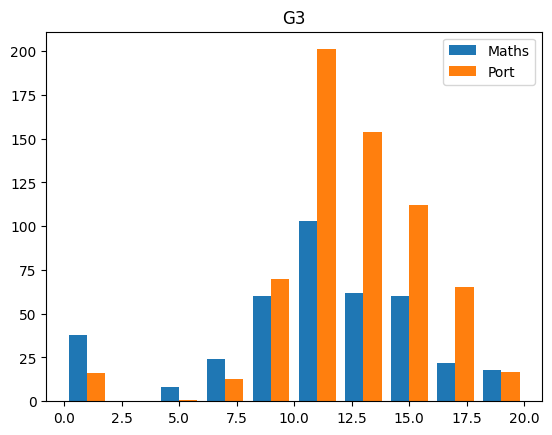

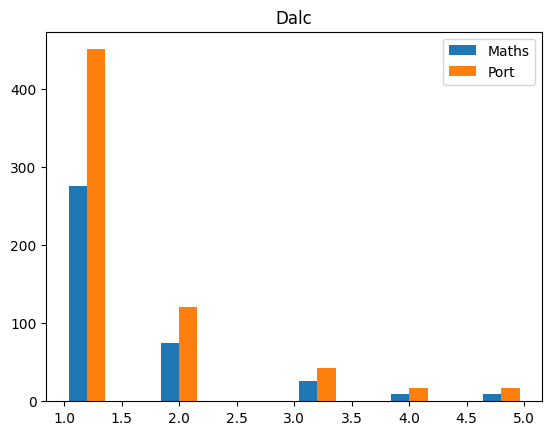

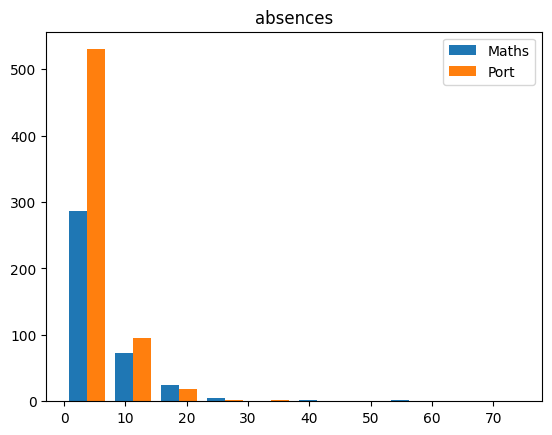

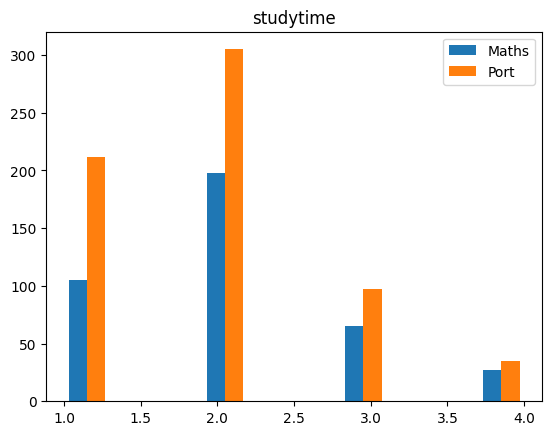

In [9]:
if not os.path.exists('./plot'):
    os.mkdir('./plot')

hist_list = ['G3', 'Dalc', 'absences', 'studytime']
for hist_i in hist_list:
    plot_utils.plot_hist(df_maths, df_port, hist_i, f'./plot/hist_{hist_i}.png', show=True)

# Heatmap

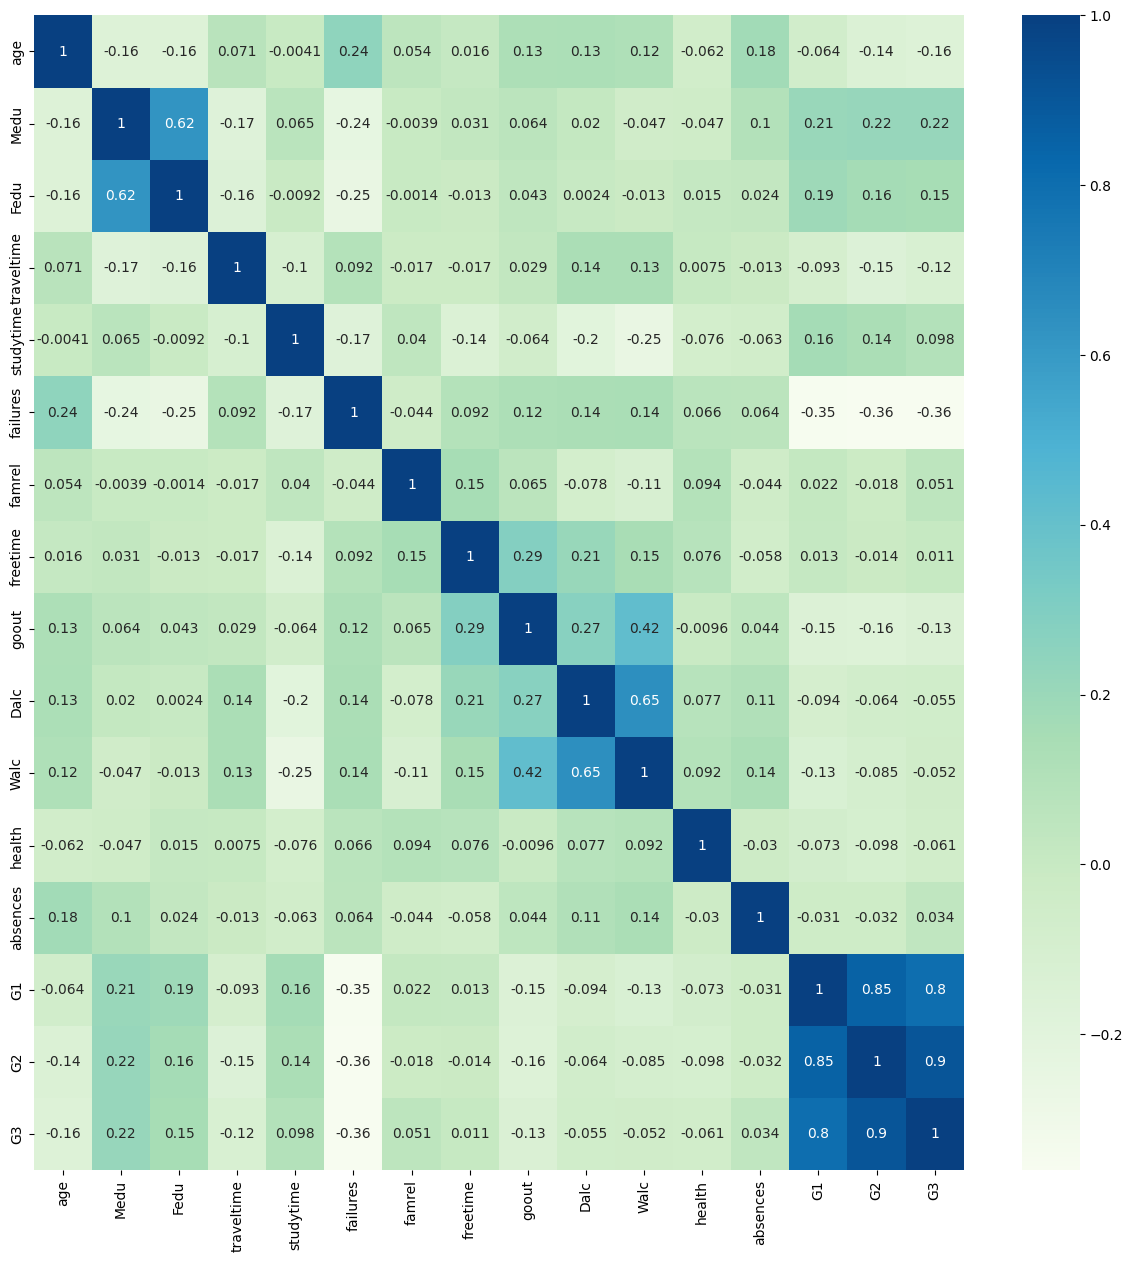

In [12]:
plot_utils.plot_heatmap(df_maths, save_path='./plot/maths_heatmap.png', show=True)

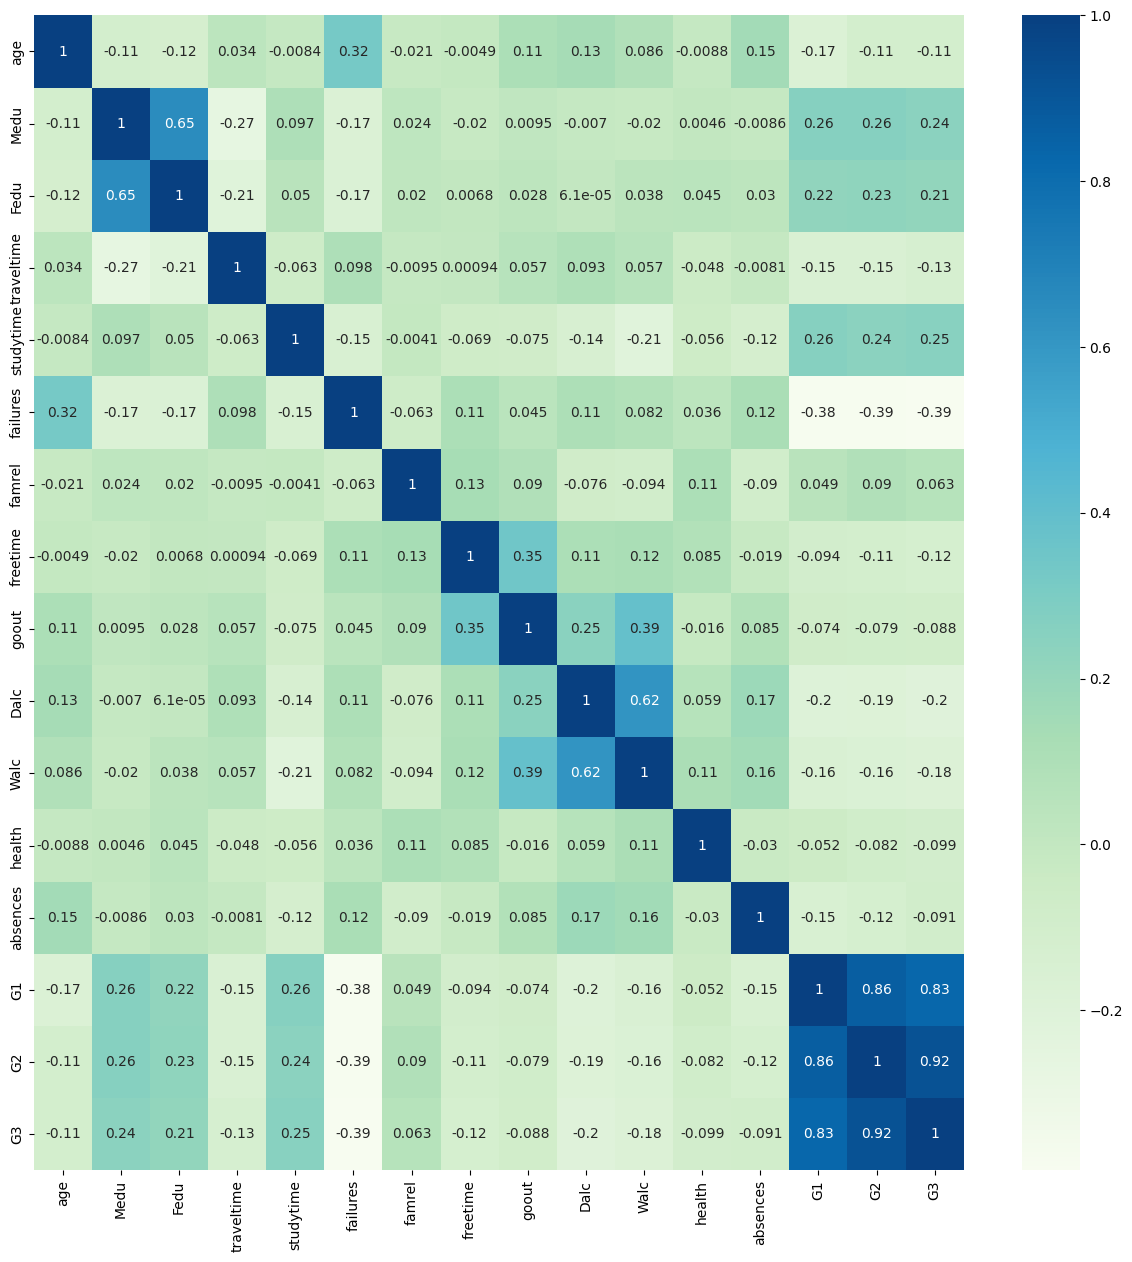

In [15]:
plot_utils.plot_heatmap(df_port, save_path='./plot/port_heatmap.png', show=True)

# Alcohol Effect on Academic Performance


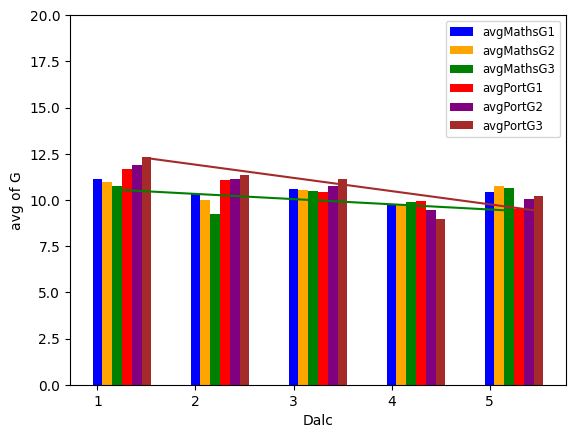

In [20]:
# X: Dalc
# Y: average grade of G1 / G2 / G3
plot_utils.plot_bar_Dalc_vs_G(df_maths, df_port)

# Non-Alcohol Effect on Academic Performance

# Academic Improvement


# Modeling And Feature Importance


In [2]:
import ModelingDataAndFeatureImportance
def model_and_feature(mysubject, my_subject_name):
    '''
    Calls host of functions to run the model, Uses trhe model to predict grades, visualizes model
    uses model to determine feature importance, plot feature importance, table to rank feature importance
    :param mysubject: the dataframe of the dataset for students' differing life factors
    :param my_subject_name: The name of the school subject students are taking
    :return: none
    '''
    my_subject = Ctgrs_to_nums(mysubject)
    my_subject_x_train_t, my_subject_x_test, my_subject_y_train,     my_subject_y_test, my_subject_x_train = train_data(my_subject)
    model_my_subject = lzy_clsfy_models(my_subject_x_test, my_subject_y_train, my_subject_y_test, my_subject_x_train)
    plt_models(model_my_subject, my_subject_name)
    my_subject_x_train_t, my_subject_x_test, my_subject_y_train, my_subject_y_test,    my_subject_x_train, my_subject_x, my_subject_y,         = train_data_no_grades(
        my_subject)
    num_of_models= 2
    for inst in range(num_of_models):
        # modeling portion
        predictions, my_model_name = predict_grades(my_subject_name, my_subject_x_test, my_subject_y_train,
                                                    my_subject_y_test, my_subject_x_train, inst)
        plot_pred_v_actual(predictions, my_subject_y_test, my_subject_name, my_model_name)
        plot_pred_v_actual_diff(predictions, my_subject_y_test, my_subject_name, my_model_name)
        plot_error_rate(predictions, my_subject_y_test, my_subject_name, my_model_name)
    for inst in range(num_of_models): 
        tree, my_model_name = determine_tree(inst)
        visualize_tree(my_subject_x_train, my_subject_y_train, inst)
        # feature importance portion
        names, values, sorted_feature_importance = find_feature_imptnc(tree, my_subject_x, my_subject_x_train, my_subject_y_train)
        plot_feature_imptnc(names, values, my_subject_name, my_model_name)
        table_feature_imptnc(sorted_feature_importance, names)

math = my_read_csv('Maths.csv')
portuguese = my_read_csv('Portuguese.csv')
model_and_feature(math, 'Math')
model_and_feature(portuguese, 'Portuguese')

ModuleNotFoundError: ignored